## GMM(Gaussian Mixture Model)
- GMM은 Parametric 모델로서 EM(Expectation Maximization) 알고리즘을 이용한 대표적인 군집화 모델이다. 
- 개별 데이터가 가우시안 분포에 속한다고 가정을 한 상태에서 특정 정규분포에 속할 확률을 추정하는 것이다. 
- Scikit-learn에서 제공하는 API의 주요 파라미터는 n_components로 사전적으로 정의하는 군집화 개수를 의미한다. 



### GMM은 특히 잘 적용이 되는 데이터 분포가 있는데 주로 타원형으로 길게 늘어진 데이터 분포에 적용이 용이하다. 
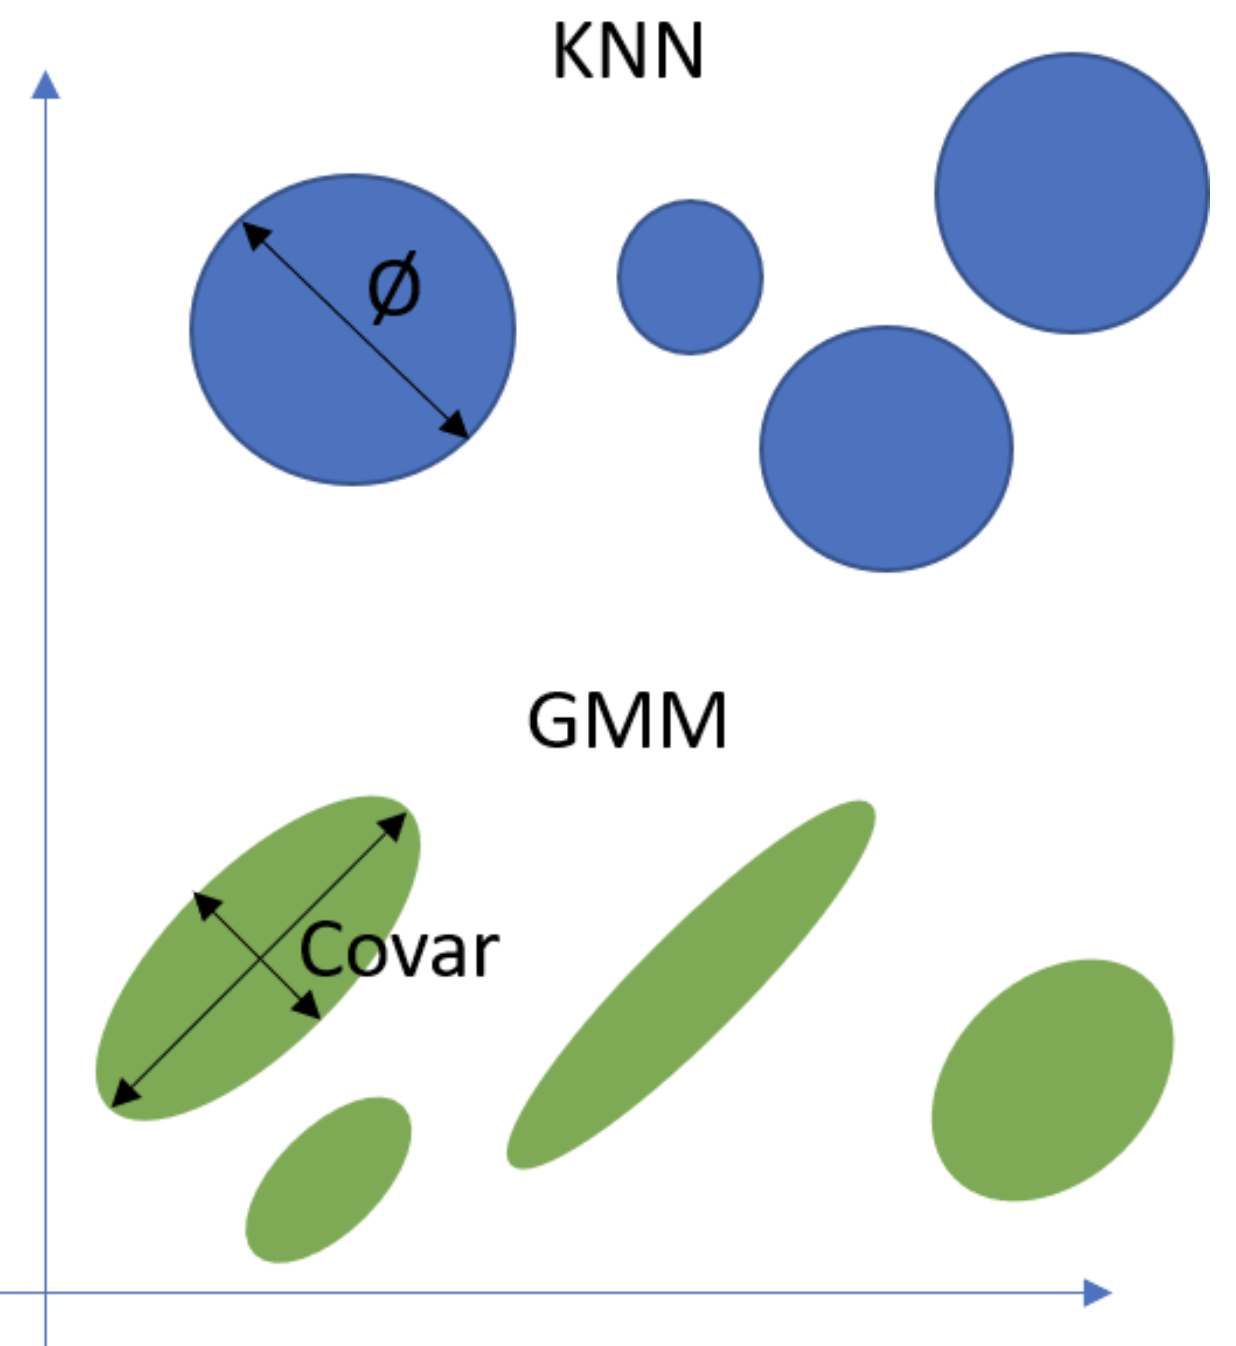

### GMM-거리기반 K-Means의 문제점

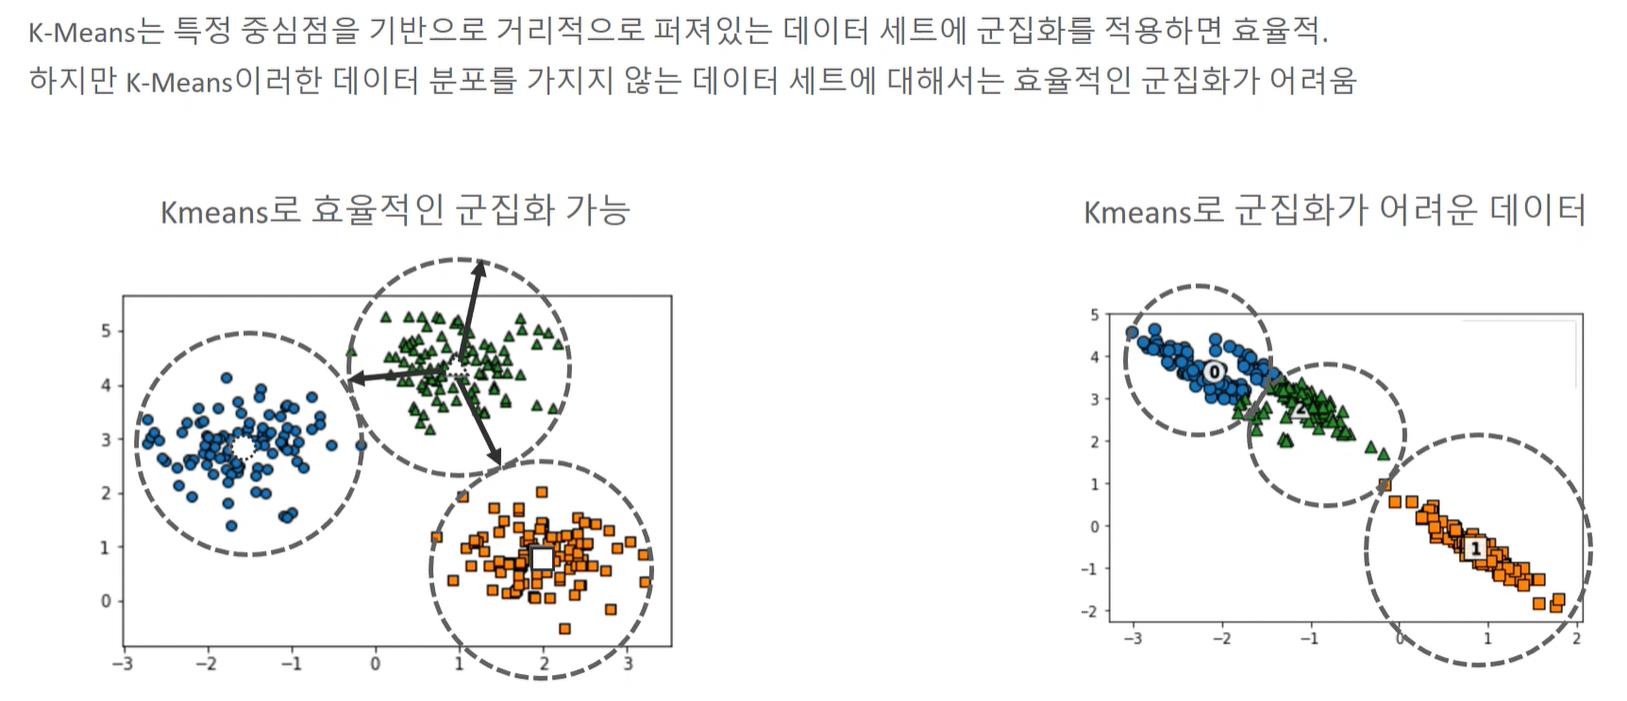

###  01_GMM(Gaussian Mixture Model)개요

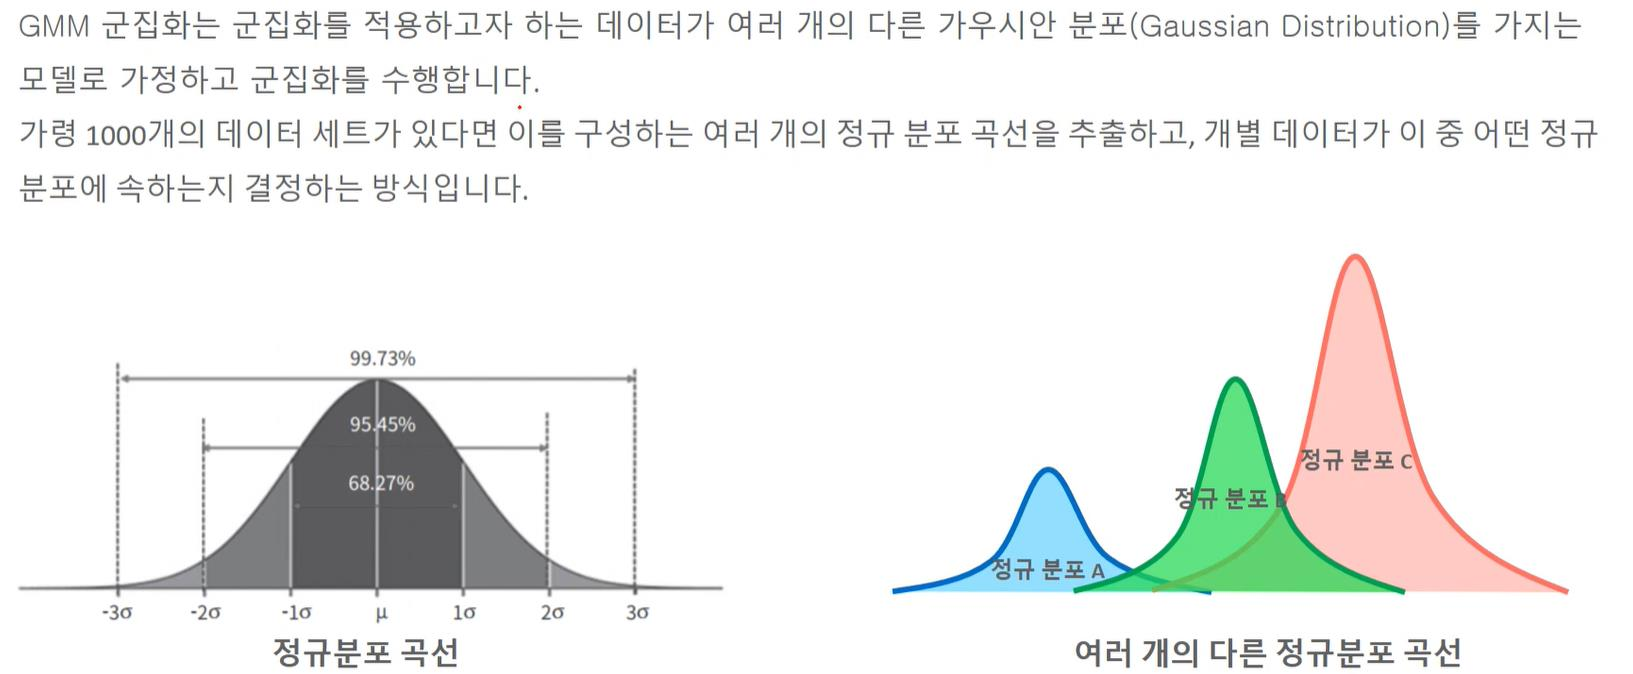

### 02_서로 다른 정규 분포로 결합된 원본 데이터 분포

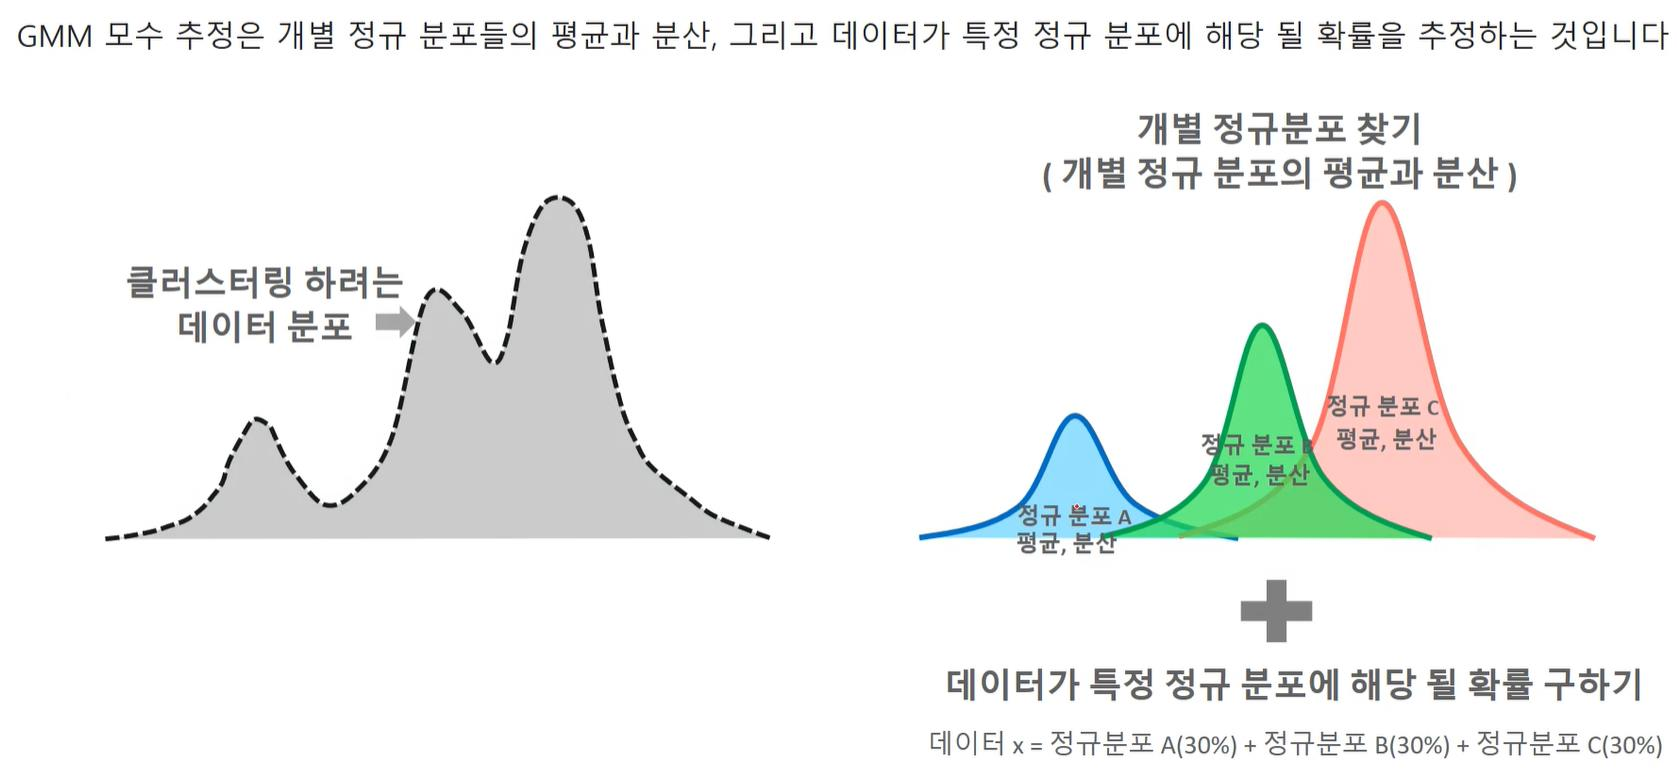

### 03_GMM모수 추정을 위한 EM(Expectation and Maximazation)

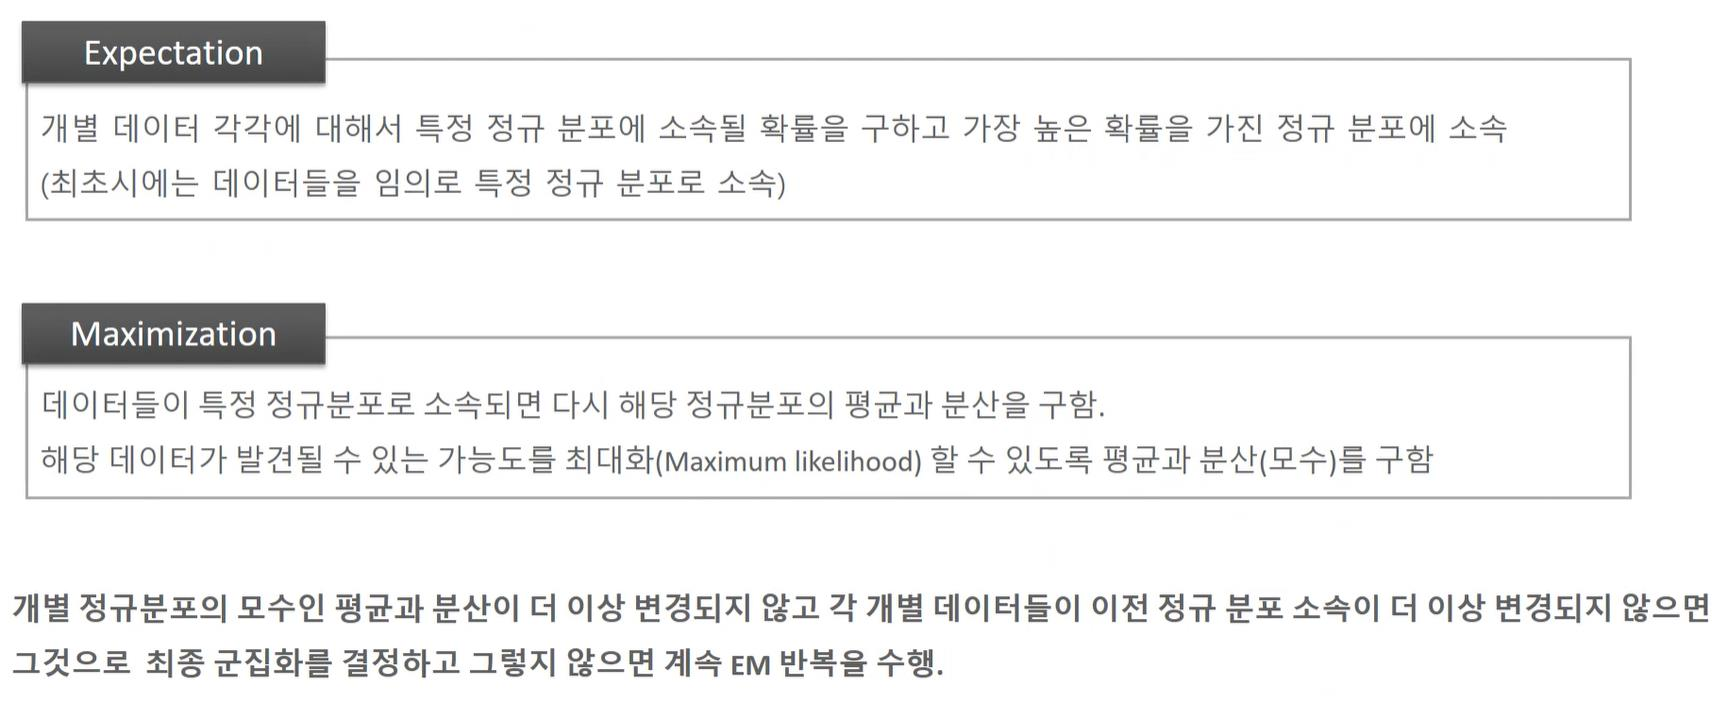

## 붓꽃 데이터를 활용한 kmeans 모델과 kmm모델의 성능 차이
 - kmeans 와 kmm 의 성능은 어떤 데이터가 들어오냐에 따라 kmm이 더 좋을수도 있고 kmeans이 더좋을수도 있다.

### 01_GMM을 이용한 붓꽃 데이터 셋 클러스터링

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris =load_iris()
irisDF =pd.DataFrame(data =iris.data, columns=['sepel_length','sepel_width','petal_lenth','petal_lenth'])

irisDF['target']= iris.target

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)

gmm_cluster_labels =gmm.predict(iris.data)


# 클러스터링 결과를 irisDF의 'gmm_cluster'컬럼명으로 저정
irisDF['gmm_cluster'] =gmm_cluster_labels
iris['target'] = iris.target

#target 값에 따라서 gmm_cluster값이 어떻게 매핑되었는지 확인
irisi_result =irisDF.groupby(['target'])['gmm_cluster'].value_counts()

print(irisi_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 02_GaussianMixture를 이용한 붓꽃 데이터 군집화

In [5]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels =kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

C:\Users\82105\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


Toy Examples –for comprehensive understanding

## kmeans와 GMM을 이용할수 있는 함수 

## 숫자형 범주데이터를 사용하여 쓸수 있다.
### 

In [6]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

### 가상의 데이터를 만든 후 클러스팅 후 군집도 시각화

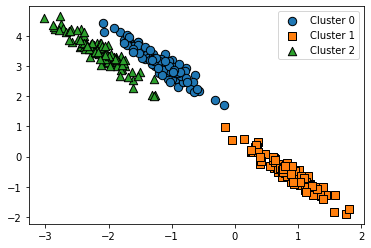

In [7]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

## visualize_cluster_plot함수를 이용해 KMeans 모델 사용
## Kmeans 모델의 군집도를 알수 있다.

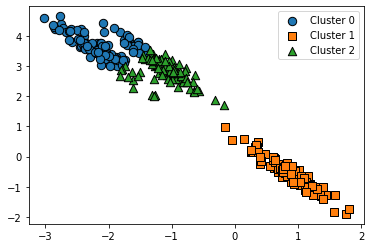

In [8]:

from sklearn.cluster import KMeans
kmeans =KMeans(3,random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=False)

## visualize_cluster_plot함수를 이용해 KMeans 모델 사용
## GMM 모델의 군집도를 알수 있다. 

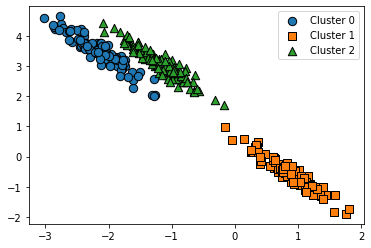

In [11]:

from sklearn.mixture import GaussianMixture
gmm =GaussianMixture(n_components=3,random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)